# PSV10 Data Average Location Grouping

### Within the PSV10 data, Inclination values and residual values for ages 0-5MA and with Normal Polarity will be averaged and groups over latitude and longitude location that are within 10 degrees of each other. 

#### The PSV10 data excel file is first adjusted to only include columns with numeric values and is then converted to a csv file so that it can be read into. Data with AGE values less than 5 MA and Model VGP latitudes greater than 45 degrees are sorted by increasing Latitude. Relevant columns are called to the Dataframe 'psv5new' and will be used to calculate average inclination and Residual values.

In [29]:
import pandas as pd

pd.set_option('display.max_rows', 10)

psv = pd.read_csv('..\data\PSV0.csv')

psv5 = psv[ (psv.age <= 5.00) & (psv.model_vgp_lat > 45) ] # model_vgp_lat >45 indicates normal polarity

psv5.sort_values(['site_lat']) 

psv5new = pd.DataFrame()

#*Update* for correct columns listed below (when uploading new data)

psv5new['LAT'] = psv5.site_lat
psv5new['LONG'] = psv5.site_lon
psv5new['AGE'] = psv5.age
psv5new['AGE_pm'] = psv5.age_pm
psv5new['AGE_high'] = psv5.age_high
psv5new['AGE_low'] = psv5.age_low
psv5new['Dec'] = psv5.dec
psv5new['Inc'] = psv5.inc
psv5new['K'] = psv5.k
psv5new['Model_vlat'] = psv5.model_vgp_lat

psv5new.reset_index(inplace=True, drop=True) # reset index 

psv5new

,LAT,LONG,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,Model_vlat
0,-39.30000,175.60000,-0.02400,0.27600,999.00000,999.00000,15.80000,-50.60000,382.81250,74.90000
1,-7.59000,110.42600,0.00000,999.00000,999.00000,999.00000,354.90000,-33.40000,462.50000,78.20000
2,19.12350,97.53770,0.00000,0.02000,999.00000,999.00000,9.60000,27.80000,233.70000,79.80000
3,4.93361,-75.46733,0.00000,0.05000,999.00000,999.00000,6.00000,7.00000,193.00000,83.90000
4,19.48000,257.78000,0.00006,999.00000,0.00007,0.00006,10.70000,37.80000,238.00000,79.80000
...,...,...,...,...,...,...,...,...,...,...
1588,-7.56700,110.46400,4.65000,999.00000,6.70000,2.59000,350.50000,-28.10000,443.70000,77.80000
1589,-7.56700,110.46400,4.65000,999.00000,6.70000,2.59000,0.80000,-28.40000,173.00000,82.00000
1590,-7.50200,110.43900,4.65000,999.00000,6.70000,2.59000,353.70000,-4.40000,228.00000,82.10000
1591,-0.45733,37.09233,4.81000,0.26000,999.00000,999.00000,357.20000,27.90000,195.00000,73.60000


#### This function caclulates the degrees between two consecutive rows in the data table by taking the dot product between the cartesian coordinates of the two data points. For dot product values that are ~1.00001, I take them to be approximately 1 so that I avoid getting any NA values after the final calculation in degrees. 

In [30]:
def calculate_degrees(dataframe, x_col, z_col, first_index, second_index):
    
    dataframe_array = dataframe.iloc[:, x_col:z_col + 1].values
    
    a = (dataframe_array[first_index,:])
    b = (dataframe_array[second_index,:])
    d = (np.dot(a,b))
    
    if 1.000000 <= d <= 1.2:
        d = 1.00
        
    return np.degrees(np.arccos(d))

In [31]:
psv5newn = psv5new.copy() #copy table to a new one as to not revert previous setting on table

psv5newn = psv5newn.sort_values(['LAT','LONG']) #sort by increasing Latitude values
psv5newn.reset_index(inplace=True) #reset index column


In [32]:
import numpy as np

pd.set_option('display.max_rows', 10)

latr = np.radians(psv5newn.LAT)   #converts Lat and Long values into radians
longr = np.radians(psv5newn.LONG)

psv5newn['X']= np.cos(latr)*np.cos(longr)  #convert Lat and Long to cartesian X,Y,Z coordinates and creates X, Y, and Z columns 
psv5newn['Y']= np.cos(latr)*np.sin(longr)
psv5newn['Z']= np.sin(latr)

psv5newn


,index,LAT,LONG,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,Model_vlat,X,Y,Z
0,1556,-78.40000,164.21000,4.00000,999.00000,8.00000,0.00000,296.50000,-78.00000,258.40000,69.50000,-0.19349,0.05472,-0.97958
1,577,-78.39000,164.20000,0.28000,0.01000,999.00000,999.00000,270.90000,-78.10000,114.50000,64.70000,-0.19365,0.05480,-0.97954
2,1557,-78.39000,164.20000,4.00000,999.00000,8.00000,0.00000,192.70000,-83.10000,140.50000,64.50000,-0.19365,0.05480,-0.97954
3,362,-78.39000,164.21000,0.08400,0.00400,999.00000,999.00000,263.10000,-85.90000,188.00000,75.10000,-0.19365,0.05476,-0.97954
4,457,-78.39000,164.23000,0.12000,0.01000,999.00000,999.00000,293.60000,-84.00000,273.00000,77.20000,-0.19367,0.05469,-0.97954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,548,71.03800,-8.45430,0.24000,999.00000,0.24000,0.24000,338.90000,73.70000,1096.00000,75.80000,0.32141,-0.04777,0.94573
1589,549,71.03800,-8.43470,0.24000,999.00000,0.24000,0.24000,192.60000,81.40000,795.00000,54.40000,0.32143,-0.04766,0.94573
1590,794,79.26000,13.61000,0.50000,999.00000,1.00000,0.00000,355.50000,54.30000,1413.00000,45.60000,0.18112,0.04385,0.98248
1591,792,79.44000,13.33000,0.50000,999.00000,1.00000,0.00000,53.50000,82.40000,1457.00000,77.90000,0.17833,0.04225,0.98306


### This functions to create groups based on the degrees calculated between two rows. It goes through the data table and holds rows together that are within 10 degrees of each other and goes on to evaluate rows thereafter to continue this matching process. 

In [33]:
psv5newn['Matched'] = False

X_col = psv5newn.columns.get_loc("X")
Z_col = psv5newn.columns.get_loc("Z")
matched_col = psv5newn.columns.get_loc("Matched")

groups = []

for first_index in range(len(psv5newn)):
    
    matched = psv5newn.iloc[first_index, matched_col]
    if not matched:
        row = psv5newn.iloc[first_index : first_index + 1,:]
        group = [row]
        psv5newn.at[first_index, 'Matched'] = True
        
        for second_index in range(len(psv5newn))[first_index+1:]:
            matched = psv5newn.iloc[second_index, matched_col]
            if not matched:
                degrees = calculate_degrees(psv5newn, X_col, Z_col, first_index, second_index)
                if(degrees < 10):
                    row = psv5newn.iloc[second_index : second_index + 1,:]
                    group.append(row)
                    psv5newn.at[second_index, 'Matched'] = True
        
        groups.append(pd.concat(group))

result = pd.concat(groups)

psv5newn = result

psv5newn.reset_index(drop=True, inplace=True) #reset index

apsv5newn =  psv5newn.iloc[:, X_col:Z_col+1].values #each row needs its own x,y,z array

del psv5newn['Matched']

#### This utilizes the "calculate_degrees" function from above to calculate the degrees between the a single data point and the data point in the row directly below it. Then it creates a column for these values called "Degree". 

In [34]:
pd.set_option('display.max_rows', 10)

# compare each row to check degree col
# if less than 10 degrees begin a group

degree = []
rowIndex =  0

for rowIndex in range(len(apsv5newn)-1):     
    degree.append(calculate_degrees(psv5newn, X_col, Z_col, rowIndex, rowIndex + 1))

psv5newn["Degree"] = pd.Series(degree)

np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

psv5newn

,index,LAT,LONG,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,Model_vlat,X,Y,Z,Degree
0,1556,-78.40000,164.21000,4.00000,999.00000,8.00000,0.00000,296.50000,-78.00000,258.40000,69.50000,-0.19349,0.05472,-0.97958,0.01020
1,577,-78.39000,164.20000,0.28000,0.01000,999.00000,999.00000,270.90000,-78.10000,114.50000,64.70000,-0.19365,0.05480,-0.97954,0.00000
2,1557,-78.39000,164.20000,4.00000,999.00000,8.00000,0.00000,192.70000,-83.10000,140.50000,64.50000,-0.19365,0.05480,-0.97954,0.00201
3,362,-78.39000,164.21000,0.08400,0.00400,999.00000,999.00000,263.10000,-85.90000,188.00000,75.10000,-0.19365,0.05476,-0.97954,0.00402
4,457,-78.39000,164.23000,0.12000,0.01000,999.00000,999.00000,293.60000,-84.00000,273.00000,77.20000,-0.19367,0.05469,-0.97954,0.00805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,548,71.03800,-8.45430,0.24000,999.00000,0.24000,0.24000,338.90000,73.70000,1096.00000,75.80000,0.32141,-0.04777,0.94573,0.00637
1589,549,71.03800,-8.43470,0.24000,999.00000,0.24000,0.24000,192.60000,81.40000,795.00000,54.40000,0.32143,-0.04766,0.94573,9.83813
1590,794,79.26000,13.61000,0.50000,999.00000,1.00000,0.00000,355.50000,54.30000,1413.00000,45.60000,0.18112,0.04385,0.98248,0.18729
1591,792,79.44000,13.33000,0.50000,999.00000,1.00000,0.00000,53.50000,82.40000,1457.00000,77.90000,0.17833,0.04225,0.98306,0.00000


In [35]:
import numpy as np
pd.set_option('display.max_rows', 10)

psv5newn["Igad"] = np.degrees(np.arctan(2*np.tan(np.radians(psv5newn.LAT)))) # degrees

psv5newn["\u0394I"] =  ((psv5newn["Inc"]) - psv5newn["Igad"])
psv5newn["AGE_unc"] = psv5newn["AGE_high"] - psv5newn["AGE_low"]

psv5newn["I stdv"] = 81/np.sqrt(np.abs(psv5newn["K"])) #inc stdv 



igadcol = psv5newn.iloc[:, psv5newn.columns.get_loc("Igad")]
igadglobal = np.average(igadcol) #= ZAm^2
print("Global Axial Dipole, Igad:", igadglobal) #vadm global 

psv5newn

Global Axial Dipole, Igad: 16.59828570572618


,index,LAT,LONG,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,Model_vlat,X,Y,Z,Degree,Igad,ΔI,AGE_unc,I stdv
0,1556,-78.40000,164.21000,4.00000,999.00000,8.00000,0.00000,296.50000,-78.00000,258.40000,69.50000,-0.19349,0.05472,-0.97958,0.01020,-84.13995,6.13995,8.00000,5.03894
1,577,-78.39000,164.20000,0.28000,0.01000,999.00000,999.00000,270.90000,-78.10000,114.50000,64.70000,-0.19365,0.05480,-0.97954,0.00000,-84.13480,6.03480,0.00000,7.56976
2,1557,-78.39000,164.20000,4.00000,999.00000,8.00000,0.00000,192.70000,-83.10000,140.50000,64.50000,-0.19365,0.05480,-0.97954,0.00201,-84.13480,1.03480,8.00000,6.83356
3,362,-78.39000,164.21000,0.08400,0.00400,999.00000,999.00000,263.10000,-85.90000,188.00000,75.10000,-0.19365,0.05476,-0.97954,0.00402,-84.13480,-1.76520,0.00000,5.90753
4,457,-78.39000,164.23000,0.12000,0.01000,999.00000,999.00000,293.60000,-84.00000,273.00000,77.20000,-0.19367,0.05469,-0.97954,0.00805,-84.13480,0.13480,0.00000,4.90234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,548,71.03800,-8.45430,0.24000,999.00000,0.24000,0.24000,338.90000,73.70000,1096.00000,75.80000,0.32141,-0.04777,0.94573,0.00637,80.25214,-6.55214,0.00000,2.44669
1589,549,71.03800,-8.43470,0.24000,999.00000,0.24000,0.24000,192.60000,81.40000,795.00000,54.40000,0.32143,-0.04766,0.94573,9.83813,80.25214,1.14786,0.00000,2.87277
1590,794,79.26000,13.61000,0.50000,999.00000,1.00000,0.00000,355.50000,54.30000,1413.00000,45.60000,0.18112,0.04385,0.98248,0.18729,84.58241,-30.28241,1.00000,2.15483
1591,792,79.44000,13.33000,0.50000,999.00000,1.00000,0.00000,53.50000,82.40000,1457.00000,77.90000,0.17833,0.04225,0.98306,0.00000,84.67478,-2.27478,1.00000,2.12205


### This plot depicts the expected relation between calculated Inclination (Igad) as a function of latitude. 

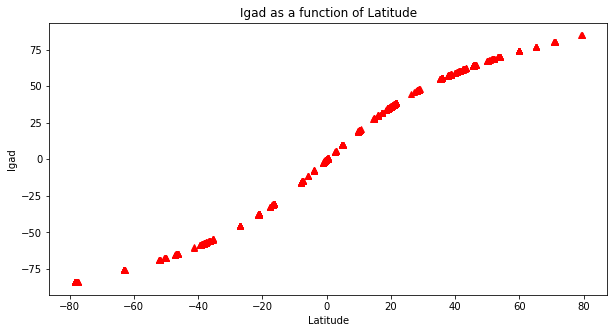

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.xlabel('Latitude')
plt.ylabel('Igad') 
plt.title('Igad as a function of Latitude')

plt.plot(psv5newn.LAT, psv5newn.Igad, 'r^')

### In order to find the average Inclinations and Declinations, the recorded values will need to converted into cartesian coordinates then averaged. Here, the Declination and Inclination values are converted to cartesian coordinates.

In [37]:
dr = np.radians(psv5newn.Dec)   #converts Dec and Inc values into radians
incr = np.radians(psv5newn.Inc)

psv5newn['X2']= np.cos(dr)*np.cos(incr)  #convert dec and inc to cartesian X,Y,Z coordinates and creates X2, Y2, and Z2 columns 
psv5newn['Y2']= np.cos(dr)*np.sin(incr)
psv5newn['Z2']= np.sin(dr)

psv5newn

,index,LAT,LONG,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,Model_vlat,X,Y,Z,Degree,Igad,ΔI,AGE_unc,I stdv,X2,Y2,Z2
0,1556,-78.40000,164.21000,4.00000,999.00000,8.00000,0.00000,296.50000,-78.00000,258.40000,69.50000,-0.19349,0.05472,-0.97958,0.01020,-84.13995,6.13995,8.00000,5.03894,0.09277,-0.43645,-0.89493
1,577,-78.39000,164.20000,0.28000,0.01000,999.00000,999.00000,270.90000,-78.10000,114.50000,64.70000,-0.19365,0.05480,-0.97954,0.00000,-84.13480,6.03480,0.00000,7.56976,0.00324,-0.01537,-0.99988
2,1557,-78.39000,164.20000,4.00000,999.00000,8.00000,0.00000,192.70000,-83.10000,140.50000,64.50000,-0.19365,0.05480,-0.97954,0.00201,-84.13480,1.03480,8.00000,6.83356,-0.11720,0.96847,-0.21985
3,362,-78.39000,164.21000,0.08400,0.00400,999.00000,999.00000,263.10000,-85.90000,188.00000,75.10000,-0.19365,0.05476,-0.97954,0.00402,-84.13480,-1.76520,0.00000,5.90753,-0.00859,0.11983,-0.99276
4,457,-78.39000,164.23000,0.12000,0.01000,999.00000,999.00000,293.60000,-84.00000,273.00000,77.20000,-0.19367,0.05469,-0.97954,0.00805,-84.13480,0.13480,0.00000,4.90234,0.04185,-0.39816,-0.91636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,548,71.03800,-8.45430,0.24000,999.00000,0.24000,0.24000,338.90000,73.70000,1096.00000,75.80000,0.32141,-0.04777,0.94573,0.00637,80.25214,-6.55214,0.00000,2.44669,0.26185,0.89545,-0.36000
1589,549,71.03800,-8.43470,0.24000,999.00000,0.24000,0.24000,192.60000,81.40000,795.00000,54.40000,0.32143,-0.04766,0.94573,9.83813,80.25214,1.14786,0.00000,2.87277,-0.14593,-0.96494,-0.21814
1590,794,79.26000,13.61000,0.50000,999.00000,1.00000,0.00000,355.50000,54.30000,1413.00000,45.60000,0.18112,0.04385,0.98248,0.18729,84.58241,-30.28241,1.00000,2.15483,0.58174,0.80958,-0.07846
1591,792,79.44000,13.33000,0.50000,999.00000,1.00000,0.00000,53.50000,82.40000,1457.00000,77.90000,0.17833,0.04225,0.98306,0.00000,84.67478,-2.27478,1.00000,2.12205,0.07867,0.58960,0.80386


### This table presents the average Latitude and Longitude for the created groups. Several other relevant calculations are made for the data groups including: average declination, average inclination, average Igad, and weighted and non-weighted Residual (ΔI) standard deviation. 

In [38]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

df = psv5newn

avglat = []             # Average Latitude of group
avglong = []            # Average Longitude of group 
avgdec = []             # Average Declination of group
avginc = []             # Average Inclination of group 
avgincstdv = []         # Standard Deviation from the Inclination
degreefa = []           # Degrees from Average group location 
avgIgadgroups = []      # Average Calculated Igad 
groupcount = []         # Counts the number of data points within a group 
delIstdvs_weight = []   # Calculates the weighted ΔI stdv
delIstdv = []           # Calculates the non-weighted ΔI stdv
Istdvs_weight = []      # Calculates the weighted stdv for the group I stdv 
age_range = []          # Calculated the Max age - Min age of the group to give the age range
age_range_min = []      # Minimum age within a group
age_range_max = []      # Maximum age within a group

avgdel_I = []

startIndex = 0
endIndex = 0
length = len(df)
inc_col = df.columns.get_loc("Inc")
age_col = df.columns.get_loc("AGE")
dec_col = df.columns.get_loc("Dec")

X_col = df.columns.get_loc("X")
Z_col = df.columns.get_loc("Z")
X2_col = df.columns.get_loc("X2") # corresponds to x cartesian value for Dec and Inc
Z2_col = df.columns.get_loc("Z2") # corresponds to z cartesian value for Dec and Inc


del_I_col = df.columns.get_loc("\u0394I")
Igad_col = df.columns.get_loc("Igad")
Istdv_col = df.columns.get_loc("I stdv")
Inc_col = df.columns.get_loc("Inc")


for rowIndex, value in df.Degree.items():
    
    if value <= 10 and endIndex != length - 1:
        endIndex += 1
        avglat.append('\/')
        avglong.append('\/')
        avgdec.append('\/')
        avginc.append('\/')
        avgincstdv.append('\/')
        avgIgadgroups.append('\/')
        groupcount.append('\/')
        delIstdvs_weight.append('\/')
        delIstdv.append('\/')
        Istdvs_weight.append('\/')
        age_range.append('\/')
        age_range_min.append('\/')
        age_range_max.append('\/')
        avgdel_I.append('\/')

        
    elif startIndex != endIndex:
        
        cartpos = df.iloc[startIndex:endIndex+1, X_col:Z_col+1]
        avgcart = np.average(cartpos.values, axis=0)
                
        x1 = avgcart[0]
        y1 = avgcart[1]
        z1 = avgcart[2]
        
        lt = np.degrees(np.arcsin(z1))
        lg = np.degrees(np.arctan2(y1,x1))
       
        avglat.append(lt)
        avglong.append(lg)
        
        cartpos_DecInc = df.iloc[startIndex:endIndex+1, X2_col:Z2_col+1]
        avgcart_DecInc = np.average(cartpos_DecInc.values, axis=0)
                
        x2 = avgcart_DecInc[0]
        y2 = avgcart_DecInc[1]
        z2 = avgcart_DecInc[2]
        
        dec = np.degrees(np.arcsin(z2))
        inc = np.degrees(np.arctan2(y2,x2))
       
        avgdec.append(dec)
        avginc.append(inc)
        
        index = rowIndex - 1
        
        inclinationstdv = np.std(df.iloc[startIndex:endIndex+1, Inc_col])
        avgincstdv.append(inclinationstdv)      
        
        igadgroup = df.iloc[startIndex:endIndex+1, Igad_col]
        avgigad = np.average(igadgroup.values, axis=0)
        avgIgadgroups.append(avgigad)
        
        groupcount.append(cartpos.shape[0])
        
        Icalculatedgroup = df.iloc[startIndex:endIndex+1, Istdv_col]   #calculated I stdv col
        
        Istdvgroup_weighted = (np.std(Icalculatedgroup)) / np.sqrt(cartpos.shape[0])
        Istdvs_weight.append(Istdvgroup_weighted)

        
        delIcalculatedgroup = df.iloc[startIndex:endIndex+1, del_I_col]
        
        delIstdvgroup = np.std(delIcalculatedgroup)  #non-weighted ΔI stdv
        delIstdv.append(delIstdvgroup)
                
        delIstdvgroup_weighted = (np.std(delIcalculatedgroup)) / np.sqrt(cartpos.shape[0])  #weighted ΔI stdv
        delIstdvs_weight.append(delIstdvgroup_weighted)
        
        
        del_I_calcgroupavg = np.average(delIcalculatedgroup.values, axis=0)
        avgdel_I.append(del_I_calcgroupavg)
        
        agegroup = df.iloc[startIndex:endIndex+1, age_col]
        age_range_calc = (max(agegroup) - min(agegroup))
        age_range.append(age_range_calc)

        age_range_mincal = min(agegroup)
        age_range_min.append(age_range_mincal)
        
        age_range_maxcal = max(agegroup)
        age_range_max.append(age_range_maxcal)
        
               
        while index >= 0 and avglat[index] == '\/':
            avglat[index] = lt
            avglong[index] = lg
            avgdec[index] = dec
            avginc[index] = inc
            avgincstdv[index] = inclinationstdv
            avgIgadgroups[index] = avgigad
            groupcount[index] = cartpos.shape[0]
            delIstdvs_weight[index] = delIstdvgroup_weighted
            delIstdv[index] = delIstdvgroup
            Istdvs_weight[index] = Istdvgroup_weighted
            age_range[index] = age_range_calc
            age_range_min[index] = age_range_mincal
            age_range_max[index] = age_range_maxcal
            
            avgdel_I[index] = del_I_calcgroupavg
            
            index -= 1
        
        startIndex = rowIndex + 1
        endIndex = startIndex
        
    else: 
        avglat.append('0')
        avglong.append('0')
        avgdec.append('0')
        avginc.append('0')
        avgincstdv.append('0')
        avgIgadgroups.append('0')
        groupcount.append('0')
        delIstdvs_weight.append('0')
        delIstdv.append('0')
        Istdvs_weight.append('0')
        age_range.append('0')
        age_range_min.append('0')
        age_range_max.append('0')
        
        avgdel_I.append('0')
        
        
        startIndex = rowIndex + 1
        endIndex = startIndex

df["AvgLat"] = pd.Series(avglat)       #Avg latitude of a group 
df["AvgLong"] = pd.Series(avglong)     #Avg longitude of a group 

df["AvgDec"] = pd.Series(avgdec)       #Avg Declination of a group 
df["AvgInc"] = pd.Series(avginc)       #Avg Inclination of a group 
df["AvgIStdv"] = pd.Series(avgincstdv) 


# Find the Degrees from the calculated Avgerage location (avglat and avglong) for each data point 
# Converting to cartesian then taking the dot between the original location and avg location

latra = np.radians(df.AvgLat.astype(float))
longra = np.radians(df.AvgLong.astype(float))

df['X_a']= np.cos(latra)*np.cos(longra)
df['Y_a']= np.cos(latra)*np.sin(longra)
df['Z_a']= np.sin(latra)
 
X_a_col = df.columns.get_loc("X_a")
Z_a_col = df.columns.get_loc("Z_a")+1

SSavgarr = df.iloc[:, X_a_col:Z_a_col].values   # array of all X,Y,Z

for row in range(len(SSavgarr)):
    a = (apsv5newn[row,:]) #array of X_a,Y_a, Z_a
    b = (SSavgarr[row,:])
    d = np.dot(a,b)
    
    if 1.000000 <= d <= 1.2:
        d = 1.00
    
    degreefa.append(np.degrees(np.arccos(d)))   #  degreefa fills in the 'DegreeFmAvg' column

df["DegreeFmAvg"] = pd.Series(degreefa)

df["IStdvWeighted"] = pd.Series(Istdvs_weight)
df["ΔIstdv"] = pd.Series(delIstdv)
df["ΔIstdvWeighted"] = pd.Series(delIstdvs_weight)
df["AvgIgad"] = pd.Series(avgIgadgroups)
df["GroupAmount"] = pd.Series(groupcount)
df["ΔIAvg"] = pd.Series(avgdel_I)
df["AgeRange"] = pd.Series(age_range)
df["MinAge of Group"] = pd.Series(age_range_min)
df["MaxAge of Group"] = pd.Series(age_range_max)

SS_avgs = df
SS_avgs


,index,LAT,LONG,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,Model_vlat,X,Y,Z,Degree,Igad,ΔI,AGE_unc,I stdv,X2,Y2,Z2,AvgLat,AvgLong,AvgDec,AvgInc,AvgIStdv,X_a,Y_a,Z_a,DegreeFmAvg,IStdvWeighted,ΔIstdv,ΔIstdvWeighted,AvgIgad,GroupAmount,ΔIAvg,AgeRange,MinAge of Group,MaxAge of Group
0,1556,-78.40000,164.21000,4.00000,999.00000,8.00000,0.00000,296.50000,-78.00000,258.40000,69.50000,-0.19349,0.05472,-0.97958,0.01020,-84.13995,6.13995,8.00000,5.03894,0.09277,-0.43645,-0.89493,-77.98879,165.33688,-0.22584,-75.51760,7.87523,-0.20133,0.05268,-0.97811,0.47141,0.20864,7.87723,0.98465,-83.92990,64,6.90021,4.23400,0.02600,4.26000
1,577,-78.39000,164.20000,0.28000,0.01000,999.00000,999.00000,270.90000,-78.10000,114.50000,64.70000,-0.19365,0.05480,-0.97954,0.00000,-84.13480,6.03480,0.00000,7.56976,0.00324,-0.01537,-0.99988,-77.98879,165.33688,-0.22584,-75.51760,7.87523,-0.20133,0.05268,-0.97811,0.46378,0.20864,7.87723,0.98465,-83.92990,64,6.90021,4.23400,0.02600,4.26000
2,1557,-78.39000,164.20000,4.00000,999.00000,8.00000,0.00000,192.70000,-83.10000,140.50000,64.50000,-0.19365,0.05480,-0.97954,0.00201,-84.13480,1.03480,8.00000,6.83356,-0.11720,0.96847,-0.21985,-77.98879,165.33688,-0.22584,-75.51760,7.87523,-0.20133,0.05268,-0.97811,0.46378,0.20864,7.87723,0.98465,-83.92990,64,6.90021,4.23400,0.02600,4.26000
3,362,-78.39000,164.21000,0.08400,0.00400,999.00000,999.00000,263.10000,-85.90000,188.00000,75.10000,-0.19365,0.05476,-0.97954,0.00402,-84.13480,-1.76520,0.00000,5.90753,-0.00859,0.11983,-0.99276,-77.98879,165.33688,-0.22584,-75.51760,7.87523,-0.20133,0.05268,-0.97811,0.46276,0.20864,7.87723,0.98465,-83.92990,64,6.90021,4.23400,0.02600,4.26000
4,457,-78.39000,164.23000,0.12000,0.01000,999.00000,999.00000,293.60000,-84.00000,273.00000,77.20000,-0.19367,0.05469,-0.97954,0.00805,-84.13480,0.13480,0.00000,4.90234,0.04185,-0.39816,-0.91636,-77.98879,165.33688,-0.22584,-75.51760,7.87523,-0.20133,0.05268,-0.97811,0.46074,0.20864,7.87723,0.98465,-83.92990,64,6.90021,4.23400,0.02600,4.26000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,548,71.03800,-8.45430,0.24000,999.00000,0.24000,0.24000,338.90000,73.70000,1096.00000,75.80000,0.32141,-0.04777,0.94573,0.00637,80.25214,-6.55214,0.00000,2.44669,0.26185,0.89545,-0.36000,68.83473,-11.12718,7.29624,73.34125,8.00095,0.35427,-0.06968,0.93254,2.38593,0.33987,8.67638,1.33880,79.20345,42,-3.42355,1.96972,0.00028,1.97000
1589,549,71.03800,-8.43470,0.24000,999.00000,0.24000,0.24000,192.60000,81.40000,795.00000,54.40000,0.32143,-0.04766,0.94573,9.83813,80.25214,1.14786,0.00000,2.87277,-0.14593,-0.96494,-0.21814,68.83473,-11.12718,7.29624,73.34125,8.00095,0.35427,-0.06968,0.93254,2.38851,0.33987,8.67638,1.33880,79.20345,42,-3.42355,1.96972,0.00028,1.97000
1590,794,79.26000,13.61000,0.50000,999.00000,1.00000,0.00000,355.50000,54.30000,1413.00000,45.60000,0.18112,0.04385,0.98248,0.18729,84.58241,-30.28241,1.00000,2.15483,0.58174,0.80958,-0.07846,68.83473,-11.12718,7.29624,73.34125,8.00095,0.35427,-0.06968,0.93254,12.22664,0.33987,8.67638,1.33880,79.20345,42,-3.42355,1.96972,0.00028,1.97000
1591,792,79.44000,13.33000,0.50000,999.00000,1.00000,0.00000,53.50000,82.40000,1457.00000,77.90000,0.17833,0.04225,0.98306,0.00000,84.67478,-2.27478,1.00000,2.12205,0.07867,0.58960,0.80386,68.83473,-11.12718,7.29624,73.34125,8.00095,0.35427,-0.06968,0.93254,12.31733,0.33987,8.67638,1.33880,79.20345,42,-3.42355,1.96972,0.00028,1.97000


#### This is to check how many data points did not get grouped. All data points were assigned a group so none will get dropped from the table.

In [39]:
pd.set_option('display.max_columns', None)

SS_avgsc = SS_avgs.copy()

del SS_avgsc["X"]
del SS_avgsc["Y"]
del SS_avgsc["Z"]
del SS_avgsc["X_a"]
del SS_avgsc["Y_a"]
del SS_avgsc["Z_a"]
del SS_avgsc["X2"]
del SS_avgsc["Y2"]
del SS_avgsc["Z2"]

no_avg_pts = SS_avgsc[SS_avgsc.AvgLat == '0']  
no_avg_pts

,index,LAT,LONG,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,Model_vlat,Degree,Igad,ΔI,AGE_unc,I stdv,AvgLat,AvgLong,AvgDec,AvgInc,AvgIStdv,DegreeFmAvg,IStdvWeighted,ΔIstdv,ΔIstdvWeighted,AvgIgad,GroupAmount,ΔIAvg,AgeRange,MinAge of Group,MaxAge of Group


#### This is to arrange the dataframe with the main columns and calculate the Global Axial Dipole (GAD). 

In [40]:
SS_avgsc.drop(SS_avgsc[SS_avgsc.AvgLat == '0'].index, inplace = True)

sscols = SS_avgsc.columns.tolist()
sscols

['index',
 'LAT',
 'LONG',
 'AGE',
 'AGE_pm',
 'AGE_high',
 'AGE_low',
 'Dec',
 'Inc',
 'K',
 'Model_vlat',
 'Degree',
 'Igad',
 'ΔI',
 'AGE_unc',
 'I stdv',
 'AvgLat',
 'AvgLong',
 'AvgDec',
 'AvgInc',
 'AvgIStdv',
 'DegreeFmAvg',
 'IStdvWeighted',
 'ΔIstdv',
 'ΔIstdvWeighted',
 'AvgIgad',
 'GroupAmount',
 'ΔIAvg',
 'AgeRange',
 'MinAge of Group',
 'MaxAge of Group']

In [41]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

SS_avgsc.drop(SS_avgsc[SS_avgsc.AvgLat == '0'].index, inplace = True)

sscols = ['AvgLat',
 'AvgLong','GroupAmount','LAT',
 'LONG',
 'AGE',
 'AGE_pm',
 'AGE_high',
 'AGE_low',
 'Dec',
 'Inc',
 'K',
 'Model_vlat',
 'Degree',
 'Igad',
 'ΔI',  'ΔIAvg',
 'ΔIstdv',
 'ΔIstdvWeighted',
 'AGE_unc',
 'I stdv',
 'AvgDec',
 'AvgInc',
 'AvgIStdv',
 'IStdvWeighted',
 'DegreeFmAvg',
 'AvgIgad',
 'AgeRange',
 'MinAge of Group',
 'MaxAge of Group']
SS_avgsc = SS_avgsc[sscols]

print(igadglobal)
SS_avgsc

16.59828570572618


,AvgLat,AvgLong,GroupAmount,LAT,LONG,AGE,AGE_pm,AGE_high,AGE_low,Dec,Inc,K,Model_vlat,Degree,Igad,ΔI,ΔIAvg,ΔIstdv,ΔIstdvWeighted,AGE_unc,I stdv,AvgDec,AvgInc,AvgIStdv,IStdvWeighted,DegreeFmAvg,AvgIgad,AgeRange,MinAge of Group,MaxAge of Group
0,-77.98879,165.33688,64,-78.40000,164.21000,4.00000,999.00000,8.00000,0.00000,296.50000,-78.00000,258.40000,69.50000,0.01020,-84.13995,6.13995,6.90021,7.87723,0.98465,8.00000,5.03894,-0.22584,-75.51760,7.87523,0.20864,0.47141,-83.92990,4.23400,0.02600,4.26000
1,-77.98879,165.33688,64,-78.39000,164.20000,0.28000,0.01000,999.00000,999.00000,270.90000,-78.10000,114.50000,64.70000,0.00000,-84.13480,6.03480,6.90021,7.87723,0.98465,0.00000,7.56976,-0.22584,-75.51760,7.87523,0.20864,0.46378,-83.92990,4.23400,0.02600,4.26000
2,-77.98879,165.33688,64,-78.39000,164.20000,4.00000,999.00000,8.00000,0.00000,192.70000,-83.10000,140.50000,64.50000,0.00201,-84.13480,1.03480,6.90021,7.87723,0.98465,8.00000,6.83356,-0.22584,-75.51760,7.87523,0.20864,0.46378,-83.92990,4.23400,0.02600,4.26000
3,-77.98879,165.33688,64,-78.39000,164.21000,0.08400,0.00400,999.00000,999.00000,263.10000,-85.90000,188.00000,75.10000,0.00402,-84.13480,-1.76520,6.90021,7.87723,0.98465,0.00000,5.90753,-0.22584,-75.51760,7.87523,0.20864,0.46276,-83.92990,4.23400,0.02600,4.26000
4,-77.98879,165.33688,64,-78.39000,164.23000,0.12000,0.01000,999.00000,999.00000,293.60000,-84.00000,273.00000,77.20000,0.00805,-84.13480,0.13480,6.90021,7.87723,0.98465,0.00000,4.90234,-0.22584,-75.51760,7.87523,0.20864,0.46074,-83.92990,4.23400,0.02600,4.26000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,68.83473,-11.12718,42,71.03800,-8.45430,0.24000,999.00000,0.24000,0.24000,338.90000,73.70000,1096.00000,75.80000,0.00637,80.25214,-6.55214,-3.42355,8.67638,1.33880,0.00000,2.44669,7.29624,73.34125,8.00095,0.33987,2.38593,79.20345,1.96972,0.00028,1.97000
1589,68.83473,-11.12718,42,71.03800,-8.43470,0.24000,999.00000,0.24000,0.24000,192.60000,81.40000,795.00000,54.40000,9.83813,80.25214,1.14786,-3.42355,8.67638,1.33880,0.00000,2.87277,7.29624,73.34125,8.00095,0.33987,2.38851,79.20345,1.96972,0.00028,1.97000
1590,68.83473,-11.12718,42,79.26000,13.61000,0.50000,999.00000,1.00000,0.00000,355.50000,54.30000,1413.00000,45.60000,0.18729,84.58241,-30.28241,-3.42355,8.67638,1.33880,1.00000,2.15483,7.29624,73.34125,8.00095,0.33987,12.22664,79.20345,1.96972,0.00028,1.97000
1591,68.83473,-11.12718,42,79.44000,13.33000,0.50000,999.00000,1.00000,0.00000,53.50000,82.40000,1457.00000,77.90000,0.00000,84.67478,-2.27478,-3.42355,8.67638,1.33880,1.00000,2.12205,7.29624,73.34125,8.00095,0.33987,12.31733,79.20345,1.96972,0.00028,1.97000


### Below is a table with group averages and information about the created groups. This is the data for locations grouped together based on if they fall within 10 degerees from each other, for normal polarity (Model VGP Latitude > 45 deg) and Ages less than 5ma. 


In [42]:
pd.set_option('display.max_rows', None)

SS_avgsgroups = SS_avgsc.copy()

# This creates a T/F column to collect the first row from the data groups
SS_avgsgroups['GroupLead'] = SS_avgsgroups['GroupAmount'].ne(SS_avgsgroups['GroupAmount'].shift(-1))

SS_avgsgroups


SSgroups = SS_avgsgroups[SS_avgsgroups.GroupLead == True]
del SSgroups['LAT']
del SSgroups['LONG']
del SSgroups['Model_vlat']
del SSgroups['K']
del SSgroups['GroupLead']
del SSgroups['DegreeFmAvg']
del SSgroups['Degree']
del SSgroups['Igad']
del SSgroups['ΔI']  
del SSgroups['AGE']
del SSgroups['AGE_pm']
del SSgroups['AGE_high']
del SSgroups['AGE_low']
del SSgroups['AGE_unc']
del SSgroups['Inc']
del SSgroups['Dec']


print('\nThere are a total of',len(SSgroups), 'groups') 
print('And there are',len(SSgroups[SSgroups.GroupAmount >= 10]), 'groups with more than 10 data point values\n') 

SSgroups.columns.name = 'SITE INFO:'

# To save this table as an excel file run: 
#    SSgroups.to_excel("../data/" + "5MA_5degGroups_PINT.xlsx")  

SSgroups


There are a total of 34 groups
And there are 33 groups with more than 10 data point values



SITE INFO:,AvgLat,AvgLong,GroupAmount,ΔIAvg,ΔIstdv,ΔIstdvWeighted,I stdv,AvgDec,AvgInc,AvgIStdv,IStdvWeighted,AvgIgad,AgeRange,MinAge of Group,MaxAge of Group
63,-77.98879,165.33688,64,6.90021,7.87723,0.98465,3.56548,-0.22584,-75.51760,7.87523,0.20864,-83.92990,4.23400,0.02600,4.26000
96,-62.95685,-60.66656,33,1.77866,7.39397,1.28713,5.10252,-14.40908,-73.11469,7.39096,0.36214,-75.68169,0.02500,0.05000,0.07500
134,-49.60935,-70.71087,38,-0.00781,9.32481,1.51268,5.17490,0.82003,-66.40973,9.33945,0.22612,-66.95797,3.14650,0.03350,3.18000
151,-46.39375,51.78405,17,-0.35425,7.06979,1.71468,3.26094,-4.19884,-64.94850,7.07405,0.42599,-64.53399,2.36000,0.64000,3.00000
196,-37.17993,-70.51379,45,3.88503,11.09087,1.65333,7.13996,0.36743,-52.80095,11.28526,0.31916,-56.59453,1.01984,0.00016,1.02000
233,-38.85014,175.91804,37,4.51707,7.22782,1.18825,5.37971,11.97805,-53.59897,7.21940,0.41234,-58.16842,0.31600,-0.02400,0.29200
247,-37.87781,143.72592,14,-3.11882,8.51675,2.27620,8.46325,3.03871,-60.58301,8.53379,0.62700,-57.26689,0.00000,2.63000,2.63000
274,-27.10000,-109.33000,27,2.58254,8.00028,1.53965,4.29903,-3.40051,-42.99491,8.00028,0.39898,-45.66403,0.34000,0.06000,0.40000
335,-21.14048,55.54307,61,-3.32577,11.14648,1.42716,5.38685,-4.44413,-41.05325,11.17491,0.26120,-37.71685,0.12250,0.00850,0.13100
409,-16.71648,-151.42249,74,-1.84656,14.00722,1.62831,6.85674,3.08274,-32.87509,13.97824,0.26996,-30.98992,3.30500,0.90500,4.21000


In [43]:
SSgroups2 = SSgroups.copy()

SSgroups2["AvgIgad"] = np.degrees(np.arctan(2*np.tan(np.radians(SSgroups.AvgLat))))
SSgroups2["new ΔI"] =  np.radians((SSgroups["AvgInc"]) - SSgroups["AvgIgad"])
SSgroups2

SITE INFO:,AvgLat,AvgLong,GroupAmount,ΔIAvg,ΔIstdv,ΔIstdvWeighted,I stdv,AvgDec,AvgInc,AvgIStdv,IStdvWeighted,AvgIgad,AgeRange,MinAge of Group,MaxAge of Group,new ΔI
63,-77.98879,165.33688,64,6.90021,7.87723,0.98465,3.56548,-0.22584,-75.51760,7.87523,0.20864,-83.92768,4.23400,0.02600,4.26000,0.14682
96,-62.95685,-60.66656,33,1.77866,7.39397,1.28713,5.10252,-14.40908,-73.11469,7.39096,0.36214,-75.68169,0.02500,0.05000,0.07500,0.04480
134,-49.60935,-70.71087,38,-0.00781,9.32481,1.51268,5.17490,0.82003,-66.40973,9.33945,0.22612,-66.95546,3.14650,0.03350,3.18000,0.00957
151,-46.39375,51.78405,17,-0.35425,7.06979,1.71468,3.26094,-4.19884,-64.94850,7.07405,0.42599,-64.53399,2.36000,0.64000,3.00000,-0.00723
196,-37.17993,-70.51379,45,3.88503,11.09087,1.65333,7.13996,0.36743,-52.80095,11.28526,0.31916,-56.60692,1.01984,0.00016,1.02000,0.06621
233,-38.85014,175.91804,37,4.51707,7.22782,1.18825,5.37971,11.97805,-53.59897,7.21940,0.41234,-58.16959,0.31600,-0.02400,0.29200,0.07975
247,-37.87781,143.72592,14,-3.11882,8.51675,2.27620,8.46325,3.03871,-60.58301,8.53379,0.62700,-57.26743,0.00000,2.63000,2.63000,-0.05788
274,-27.10000,-109.33000,27,2.58254,8.00028,1.53965,4.29903,-3.40051,-42.99491,8.00028,0.39898,-45.66403,0.34000,0.06000,0.40000,0.04658
335,-21.14048,55.54307,61,-3.32577,11.14648,1.42716,5.38685,-4.44413,-41.05325,11.17491,0.26120,-37.71691,0.12250,0.00850,0.13100,-0.05823
409,-16.71648,-151.42249,74,-1.84656,14.00722,1.62831,6.85674,3.08274,-32.87509,13.97824,0.26996,-30.99139,3.30500,0.90500,4.21000,-0.03290


#### This plot depicts the Average Residuals calculated as a function of Average Latitude

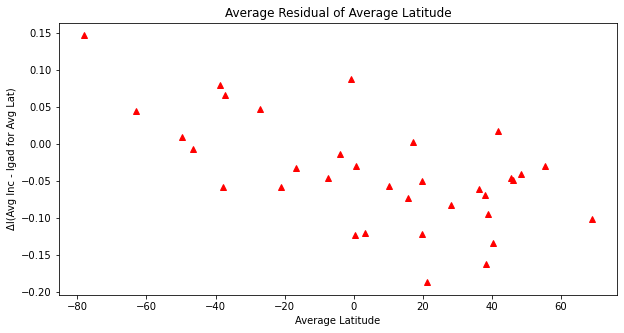

In [44]:
plt.figure(figsize=(10, 5))

plt.xlabel('Average Latitude')
plt.ylabel('ΔI(Avg Inc - Igad for Avg Lat)') 
plt.title('Average Residual of Average Latitude')

plt.plot(SSgroups2.AvgLat, SSgroups2["new ΔI"], 'r^')

#### This plot depicts the age ranges or lack thereof for the groups.

<ErrorbarContainer object of 3 artists>

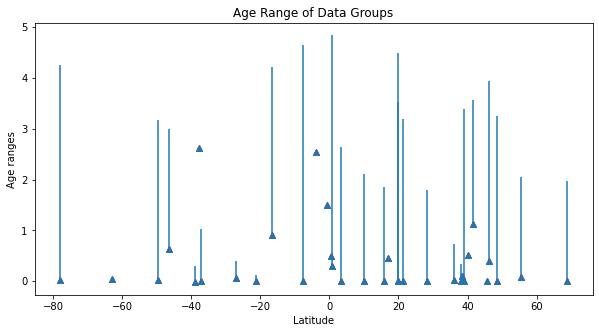

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.xlabel('Latitude')
plt.ylabel('Age ranges') 
plt.title('Age Range of Data Groups')

plt.plot(SSgroups.AvgLat, SSgroups["MinAge of Group"], 'r^')

lower_error = np.zeros(len(SSgroups2.AvgLat)) #adjusts for how many groups there are 
upper_error = SSgroups["AgeRange"]
asymmetric_error = [lower_error, upper_error]

plt.errorbar(SSgroups.AvgLat, SSgroups["MinAge of Group"], yerr = asymmetric_error, fmt = '^')
#plt.savefig('../figs/' + 'AgeRangeOfGroups.png', dpi=150)

#### This plot depicts the Average Residuals with weighted uncertainty for the groups.

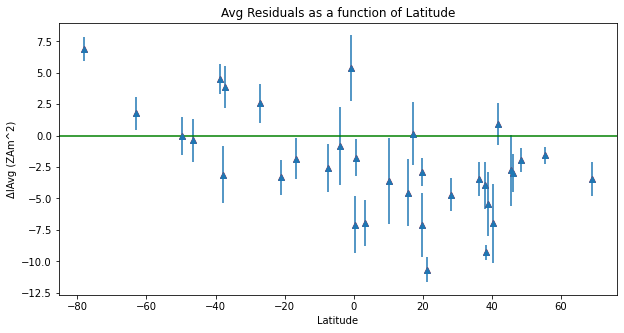

In [46]:
plt.figure(figsize=(10, 5))

plt.xlabel('Latitude')
plt.ylabel('ΔIAvg (ZAm^2)') 
plt.title('Avg Residuals as a function of Latitude')

plt.plot(SSgroups.AvgLat, SSgroups.ΔIAvg, 'r^')
plt.errorbar(SSgroups.AvgLat, SSgroups.ΔIAvg, yerr = np.abs(SSgroups['ΔIstdvWeighted']), fmt = '^')
plt.axhline(y=0, color='g')

# plt.savefig('../figs/' + 'AvgResidualsweightedVSlatitude.png', dpi=150)

#### This plot depicts the Average Residuals with non-weighted uncertainty for the groups.

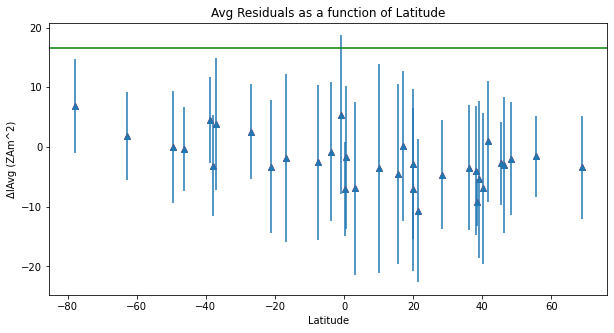

In [47]:
plt.figure(figsize=(10, 5))

plt.xlabel('Latitude')
plt.ylabel('ΔIAvg (ZAm^2)') 
plt.title('Avg Residuals as a function of Latitude')

plt.plot(SSgroups.AvgLat, SSgroups.ΔIAvg, 'r^')
plt.errorbar(SSgroups.AvgLat, SSgroups.ΔIAvg, yerr = np.abs(SSgroups['ΔIstdv']), fmt = '^')
plt.axhline(y=igadglobal, color='g')

plt.savefig('../figs/' + 'PSV10AvgResidualsVSlatitude.png', dpi=150)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd
import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

### This plots the average locations in white and plots PINT avg groups in blue

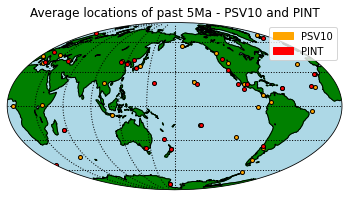

In [49]:
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=180))


gl=ax.gridlines(crs=ccrs.PlateCarree(),color='black',linewidth=1,linestyle='dotted')
gl.top_labels = False
gl.ylocator=mticker.FixedLocator(np.arange(-90,91,30))
gl.xlocator=mticker.FixedLocator(np.arange(0,400,30));
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.title('Average locations of past 5Ma - PSV10 and PINT')

ax.add_feature(OCEAN,color='lightblue')
ax.add_feature(LAND,color='green')
ax.add_feature(LAKES,facecolor='lightblue',edgecolor='black')
ax.plot([SSgroups.AvgLong.values],[SSgroups.AvgLat.values],marker='o',color='orange',\
        markersize=4,transform=ccrs.Geodetic(), markeredgecolor='black')

pintgroups = pd.read_pickle("PINT_AvgGroups.pkl")
, 
ax.plot([pintgroups.AvgLong.values],[pintgroups.AvgLat.values],marker='o',color='red',\
        markersize=4,transform=ccrs.Geodetic(),markeredgecolor='black')

import matplotlib.patches as mpatches
PSV10 = mpatches.Patch(color='orange', label='PSV10')
PINT = mpatches.Patch(color='red', label='PINT')
plt.legend(handles=[PSV10,PINT])

ax.set_global()

ax.coastlines();

plt.savefig('../figs/' + 'psv10-PINTavglocations5ma.png', dpi=150)

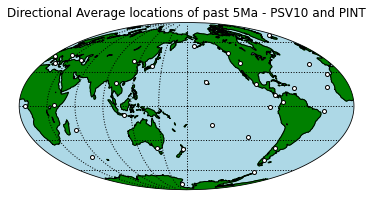

In [50]:
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=180))


gl=ax.gridlines(crs=ccrs.PlateCarree(),color='black',linewidth=1,linestyle='dotted')
gl.top_labels = False
gl.ylocator=mticker.FixedLocator(np.arange(-90,91,30))
gl.xlocator=mticker.FixedLocator(np.arange(0,400,30));
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.title('Directional Average locations of past 5Ma - PSV10 and PINT')

ax.add_feature(OCEAN,color='lightblue')
ax.add_feature(LAND,color='green')
ax.add_feature(LAKES,facecolor='lightblue',edgecolor='black')
ax.plot([SSgroups.AvgLong.values],[SSgroups.AvgLat.values],marker='o',color='white',\
        markersize=4,transform=ccrs.Geodetic(),markeredgecolor='black')


ax.set_global()

ax.coastlines();

plt.savefig('../figs/' + 'psv10avglocations5malarge.png', dpi=150)

#### This plot depicts the Average Inclination for the groups.

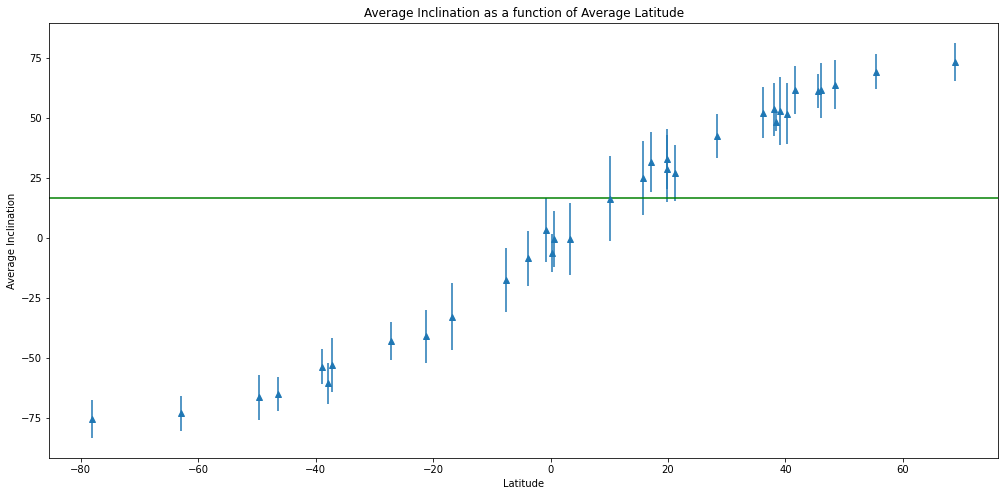

In [51]:
plt.figure(figsize=(17, 8))

plt.xlabel('Latitude')
plt.ylabel('Average Inclination') 
plt.title('Average Inclination as a function of Average Latitude')

plt.errorbar(SSgroups.AvgLat, SSgroups.AvgInc, yerr = SSgroups.AvgIStdv, fmt = '^')
plt.axhline(y=igadglobal, color='g')


# plt.savefig('../figs/' + 'AvgfieldVSavglatitude.png', dpi=150)

#### For comparison to the averages, this plot depicts the Inclination for all the Normal Polarity data points.

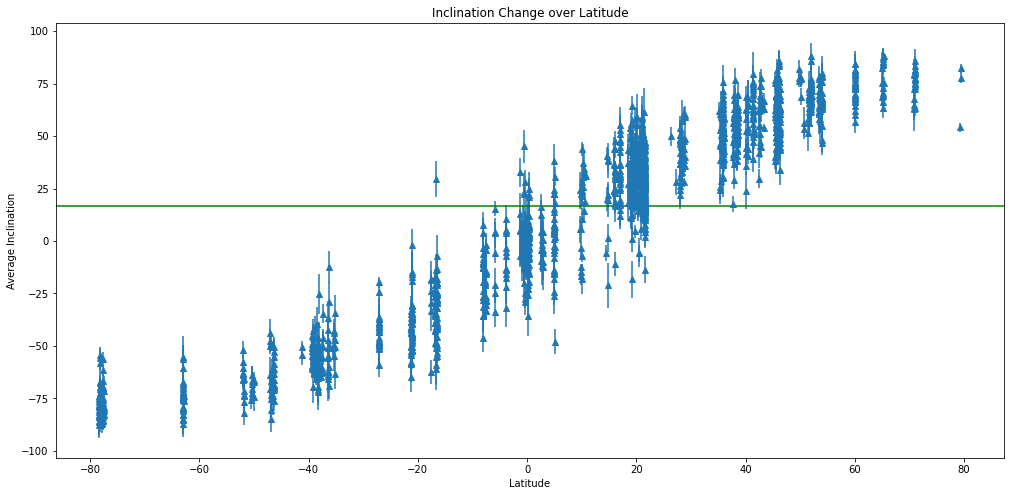

In [52]:
plt.figure(figsize=(17, 8))

plt.xlabel('Latitude')
plt.ylabel('Average Inclination') 
plt.title('Inclination Change over Latitude')

plt.errorbar(SS_avgsc.LAT, SS_avgsc.Inc, yerr = SS_avgs["I stdv"], fmt = '^')
plt.axhline(y=igadglobal, color='g')

# plt.savefig('../figs/' + 'FieldVSlatitude.png', dpi=150)

#### This plot depicts the Average ΔI for the groups.

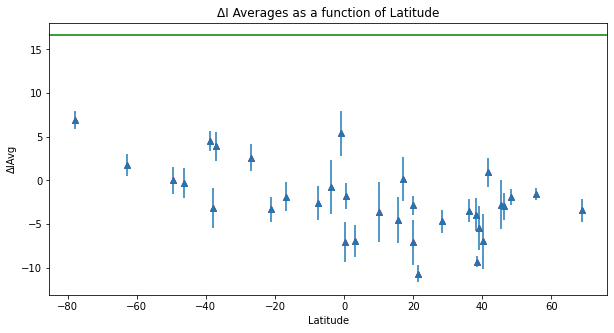

In [53]:
plt.figure(figsize=(10, 5))

plt.xlabel('Latitude')
plt.ylabel('ΔIAvg') 
plt.title('ΔI Averages as a function of Latitude')

plt.plot(SSgroups.AvgLat, SSgroups.ΔIAvg, 'r^')
plt.errorbar(SSgroups.AvgLat, SSgroups.ΔIAvg, yerr = np.abs(SSgroups.ΔIstdvWeighted), fmt = '^')
plt.axhline(y=igadglobal, color='g')

# plt.savefig('../figs/' + 'VADMavgsVSlatitude.png', dpi=150)

#### This plot depicts the individual ΔIs in comparison to the GAD.

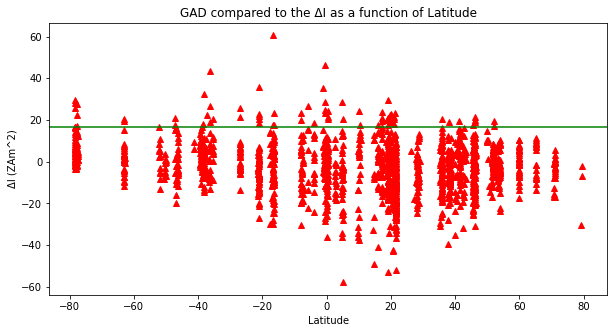

In [54]:
plt.figure(figsize=(10, 5))

plt.xlabel('Latitude')
plt.ylabel('ΔI (ZAm^2)') #units?
plt.title('GAD compared to the ΔI as a function of Latitude')

plt.plot(SS_avgsc.LAT, SS_avgs.ΔI, 'r^')
plt.axhline(y=igadglobal, color='g')

# plt.savefig('../figs/' + 'GAD_VADMsVSlatitude.png', dpi=150)

#### This saves the group table with residuals as a data table within python. 


In [55]:
SSgroups.to_pickle("PSV10_AvgGroups.pkl")